# Titanic Survivle Classificsation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description and Problem Definition

This dataset is the Titanic dataset with the following characteristics:

- Size: 891 rows × 12 columns.

- Features:

    - PassengerId – unique identifier.
    - Pclass – passenger class (1st, 2nd, 3rd).
    - Name – passenger’s full name.
    - Sex – gender.
    - Age – age in years.
    - SibSp – number of siblings/spouses aboard.
    - Parch – number of parents/children aboard.
    - Ticket – ticket number.
    - Fare – ticket price.
    - Cabin – cabin number.
    - Embarked – port of embarkation (C, Q, S).

- Target:

    - Survived (0 = No, 1 = Yes).

- The primary objective of this project is to build predictive models to identify passenger who are likely to survive from the Titanic incident.

- By analyzing passenger features, the project aims to:

  - Explore and preprocess the data.
  - Use the tree-based models.

In [79]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


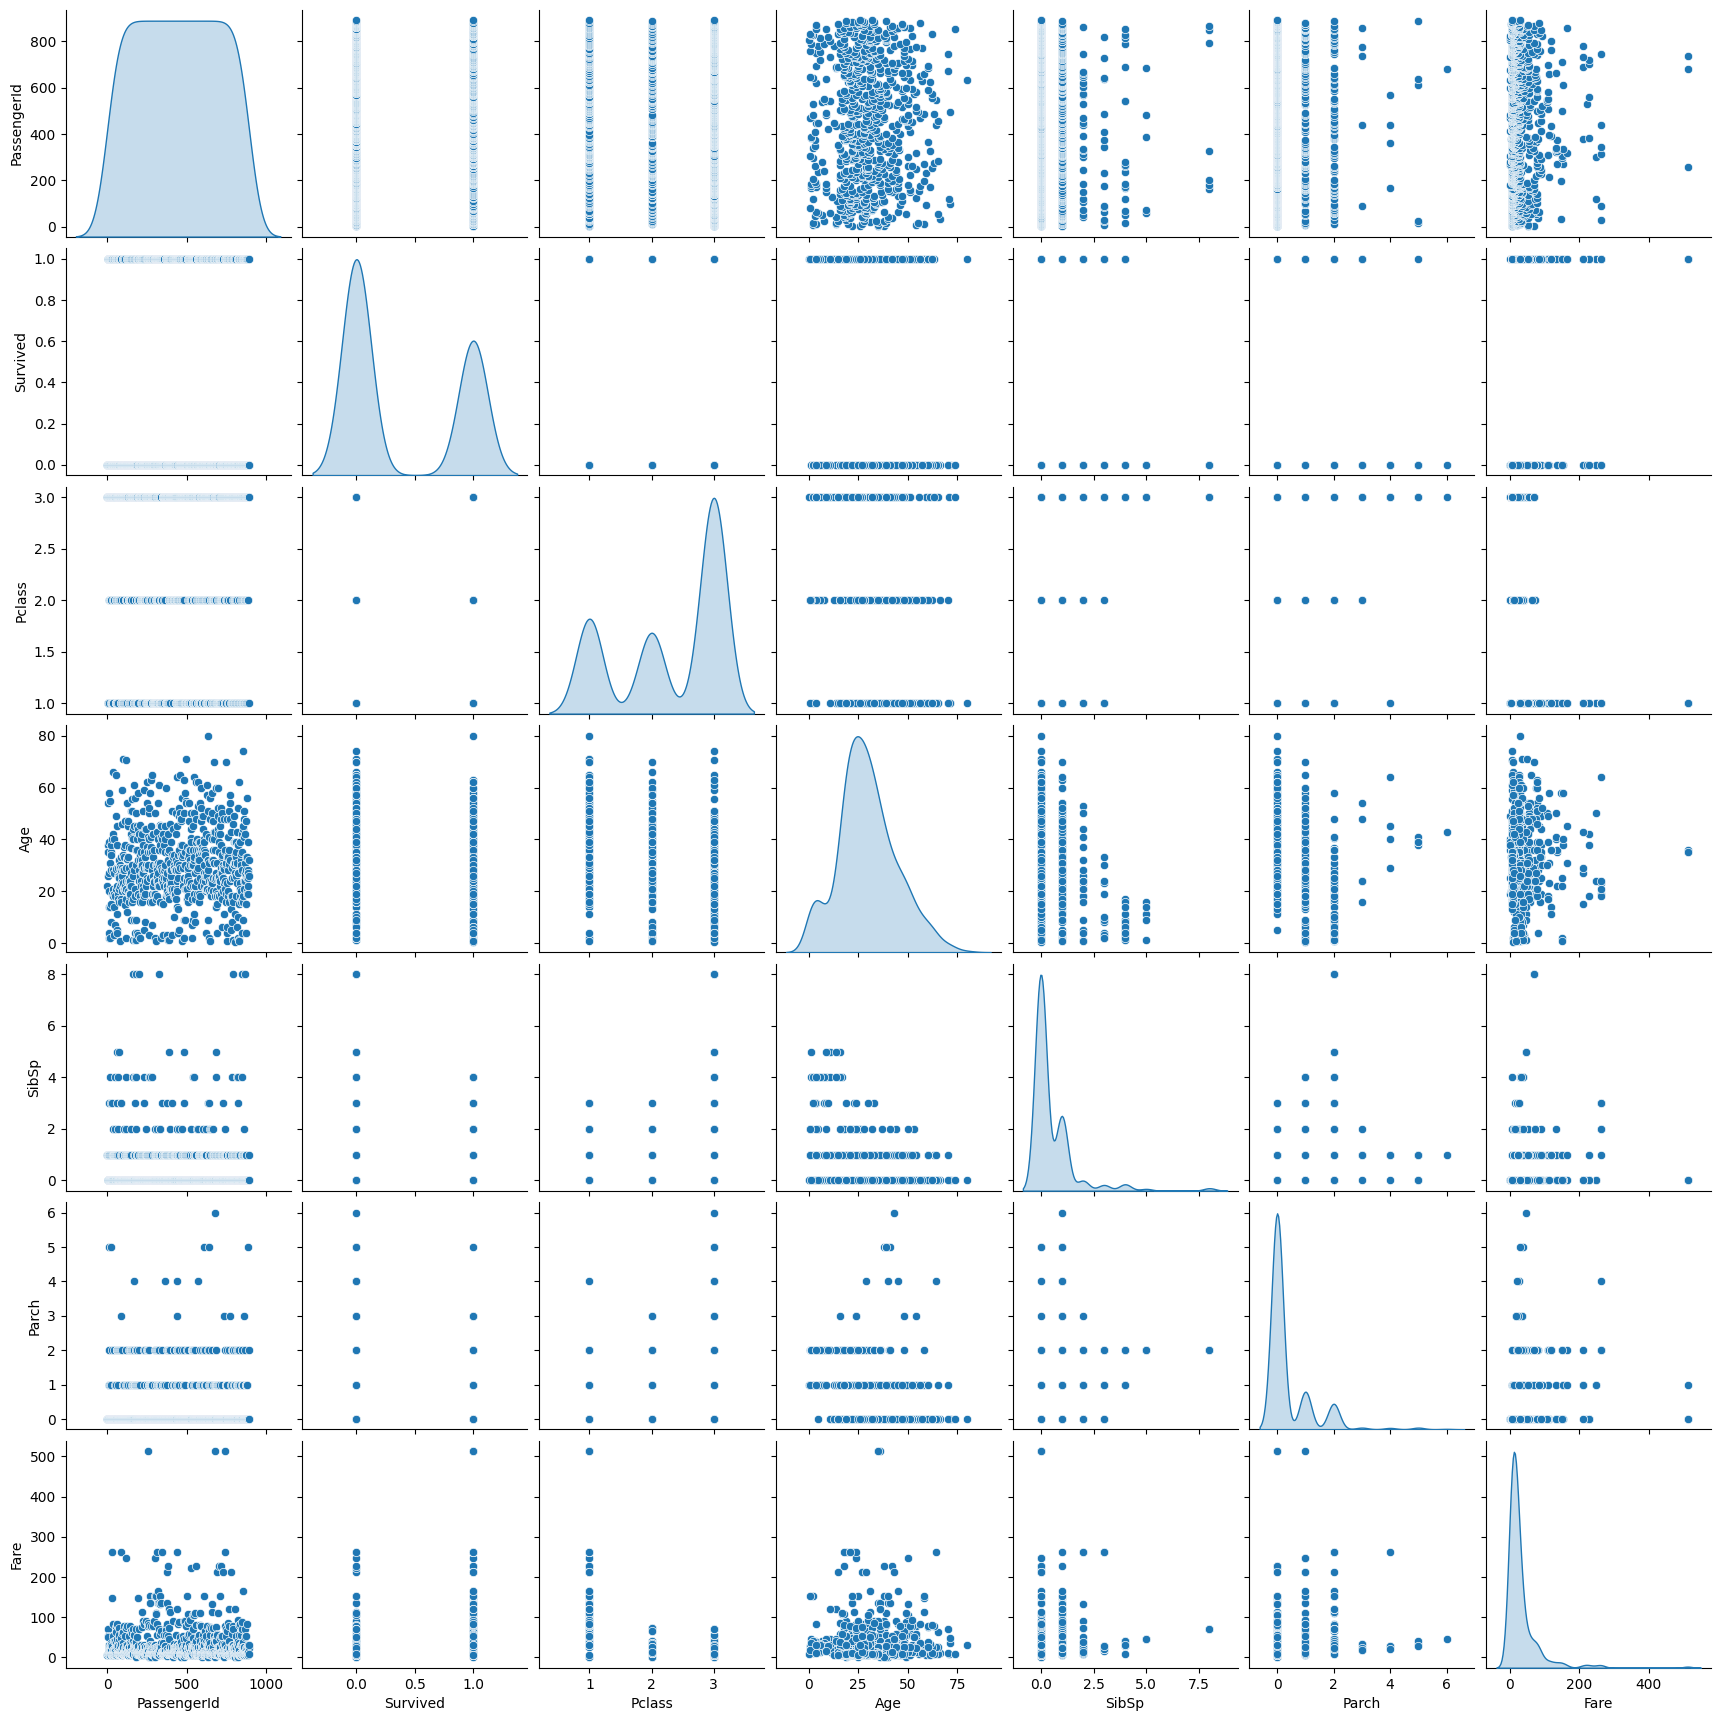

In [6]:
sns.pairplot(df, diag_kind="kde")

In [7]:
num_df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

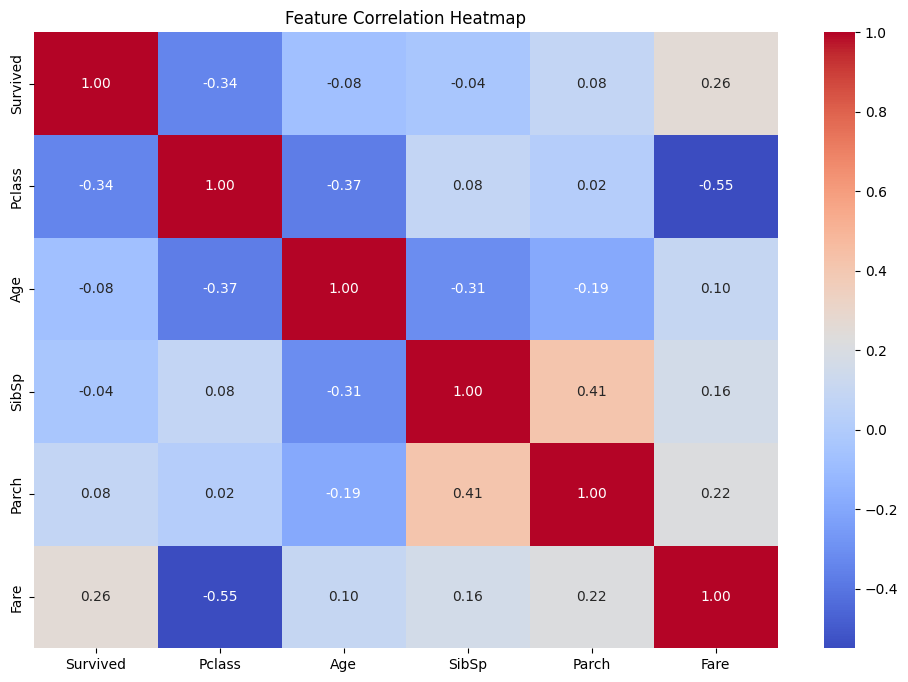

In [8]:
corr_matrix = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [214]:
num_cols = [ 'Age', 'Fare']

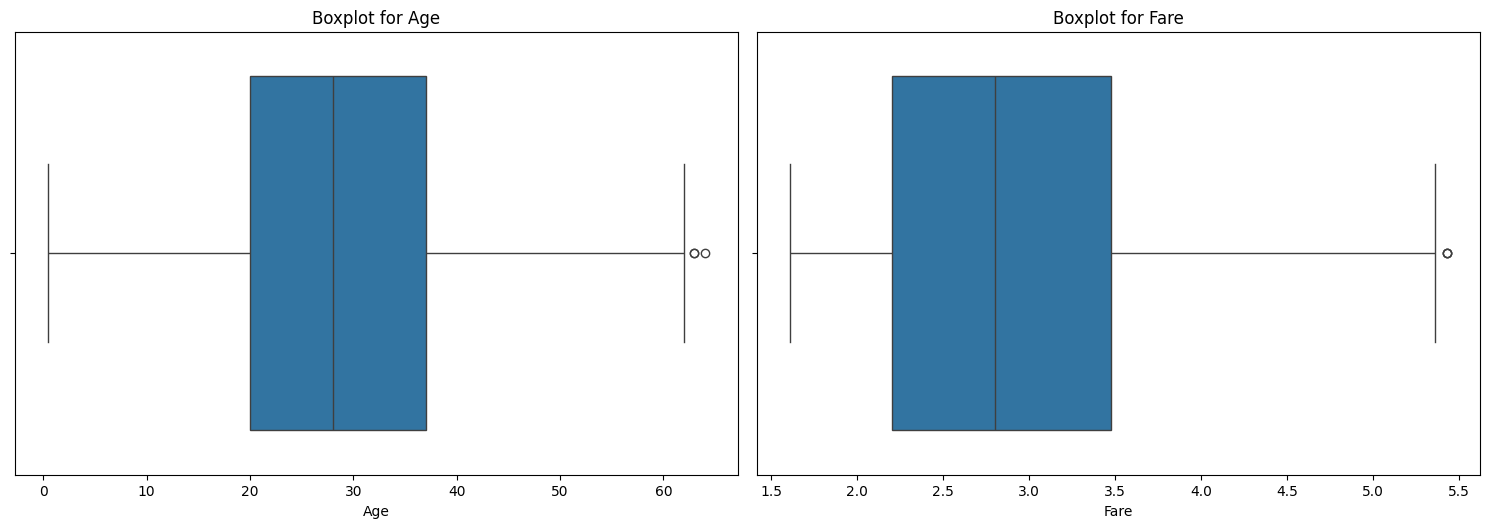

In [215]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

- There is outliers at Age and Fare
- There is skwens at Fare

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

Imbalanced Data

In [95]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.593838
1    0.406162
Name: proportion, dtype: float64

Use class_weight to avoid overfitting cause to the small dataset

In [14]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Preprocessing

In [284]:
df = pd.read_csv("titanic.csv")

combine two features in one feature

In [206]:
df['relatives'] = df['SibSp'] + df['Parch']

Drop useless columns

In [285]:
df.drop(columns=['PassengerId', 'Embarked', 'Cabin', 'Ticket', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)

In [286]:
df.dropna(inplace=True)

In [287]:
# Normalize Fare column
df['Fare'] = np.log1p(df['Fare'])

In [210]:
# Normalize relatives column
df['relatives'] = np.log1p(df['relatives'])

In [288]:
# drop Age outliers
Q1 = df['Age'].quantile(.25)
Q3 = df['Age'].quantile(.75)
IQR = Q3 - Q1
    
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
    
df = df[(df['Age'] >= minimum) & (df['Age'] <= maximum)]

In [289]:
# drop Fare outliers
Q1 = df['Fare'].quantile(.25)
Q3 = df['Fare'].quantile(.75)
IQR = Q3 - Q1
    
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
    
df = df[(df['Fare'] >= minimum) & (df['Fare'] <= maximum)]

In [290]:
# Encoding Sex column
df['Sex'] = df['Sex'].map({'male':1, 'female':0})

### Scale The Data

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [292]:
scaler = MinMaxScaler()
cols_to_scale = ['Pclass', 'Age',  'Fare']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [293]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,1.0,1,0.339415,0.130449
1,1,0.0,0,0.591066,0.698655
2,1,1.0,0,0.402328,0.151038
3,1,0.0,0,0.543882,0.622796
4,0,1.0,1,0.543882,0.154679
...,...,...,...,...,...
885,0,1.0,0,0.606795,0.469517
886,0,0.5,1,0.418056,0.268901
887,1,0.0,0,0.292230,0.477013
889,1,0.0,1,0.402328,0.477013


### Split The Data

In [26]:
from sklearn.model_selection import train_test_split

In [294]:
X = df.drop(columns='Survived',axis=1)
y = df['Survived']

In [295]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Modeling and Evaluation

In [29]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

### Logostic Regression (Baseline) Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [218]:
Model_L = LogisticRegression(class_weight='balanced')
Model_L.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [219]:
y_pred_L = Model_L.predict(X_valid)
y_train_pred_L = Model_L.predict(X_train)

In [220]:
print(classification_report(y_valid, y_pred_L))
print("ROC-AUC Score (Logistic Regression):", roc_auc_score(y_valid, y_pred_L))
print("Accuracy score : ",accuracy_score(y_train, y_train_pred_L))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        58
           1       0.70      0.71      0.70        45

    accuracy                           0.74       103
   macro avg       0.73      0.73      0.73       103
weighted avg       0.74      0.74      0.74       103

ROC-AUC Score (Logistic Regression): 0.7348659003831418
Accuracy score :  0.8058455114822547


<Axes: >

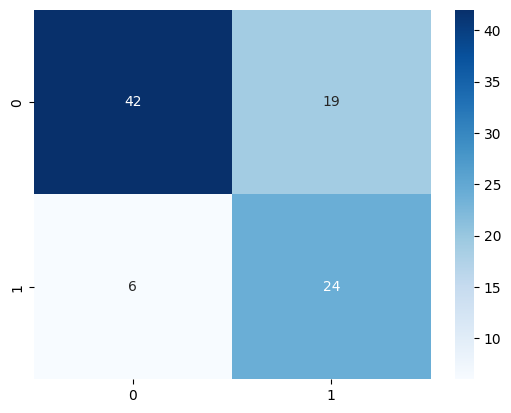

In [34]:
conf = confusion_matrix(y_valid, y_pred_L)
sns.heatmap(conf, annot=True, cmap='Blues')

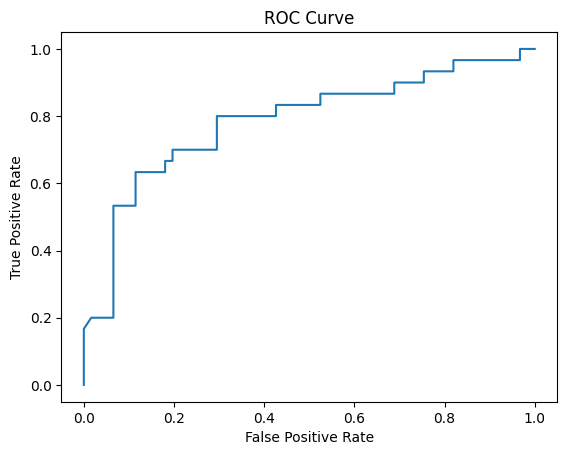

In [35]:
# ROC-AUC for Logistic regression
y_proba_L = Model_L.predict_proba(X_valid)[:, 1]
fpr, tpr, _ = roc_curve(y_valid, y_proba_L)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

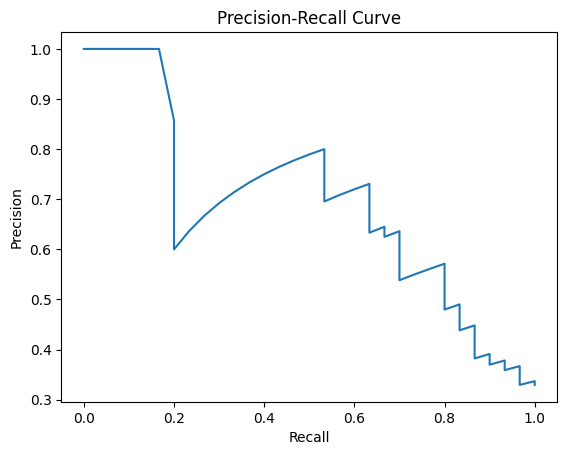

In [36]:
precision, recall, thresholds = precision_recall_curve(y_valid,y_proba_L)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

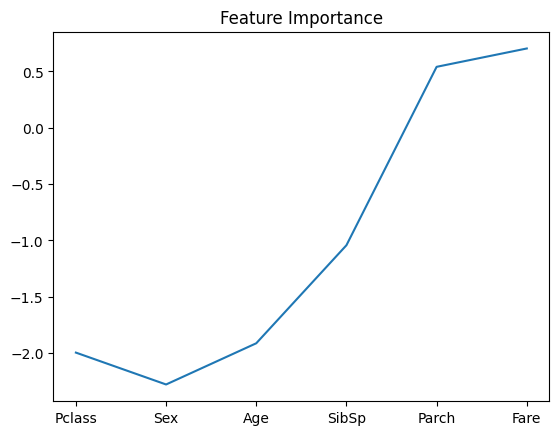

In [37]:
coefs = Model_L.coef_[0]
feature_names = X_train.columns
coef_series = pd.Series(coefs, index=feature_names)
coef_series.plot()
plt.title('Feature Importance')

## Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
Model_D = DecisionTreeClassifier(class_weight='balanced')
Model_D.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [238]:
y_pred_D = Model_D.predict(X_valid)
y_train_pred_D = Model_D.predict(X_train)

In [239]:
print(classification_report(y_valid, y_pred_D))
print("ROC-AUC Score (Decision tree):", roc_auc_score(y_valid, y_pred_D))
print("Accuracy score : ",accuracy_score(y_train, y_train_pred_D))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        58
           1       0.62      0.58      0.60        45

    accuracy                           0.66       103
   macro avg       0.65      0.65      0.65       103
weighted avg       0.66      0.66      0.66       103

ROC-AUC Score (Decision tree): 0.6509578544061302
Accuracy score :  0.9937369519832986


<Axes: >

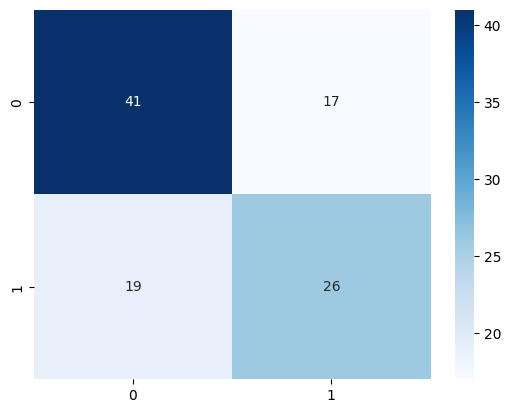

In [233]:
conf = confusion_matrix(y_valid, y_pred_D)
sns.heatmap(conf, annot=True, cmap='Blues')

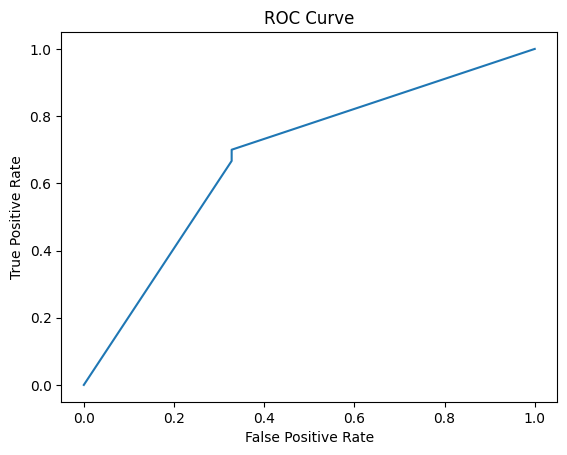

In [43]:
# ROC-AUC for Decision Tree
y_proba_D = Model_D.predict_proba(X_valid)[:, 1]
fpr, tpr, _ = roc_curve(y_valid, y_proba_D)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

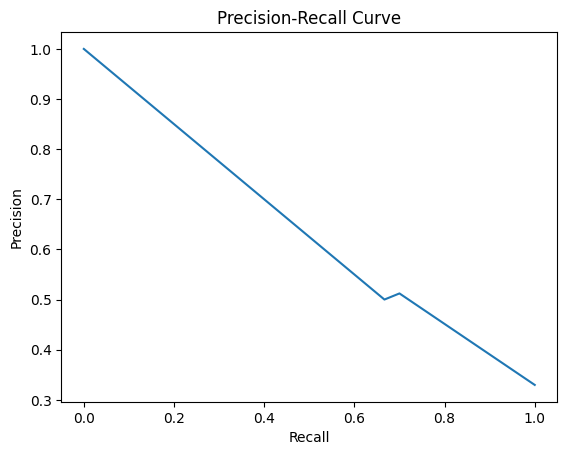

In [44]:
precision, recall, thresholds = precision_recall_curve(y_valid,y_proba_D)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

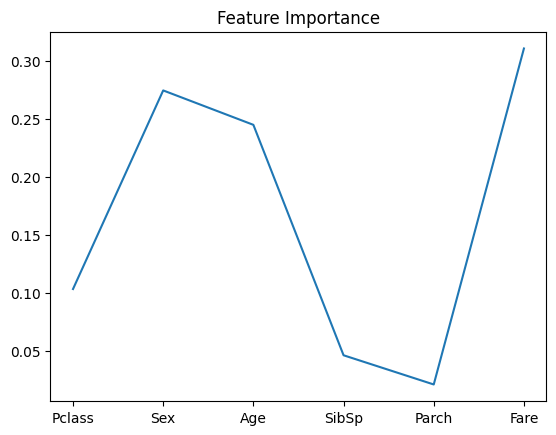

In [45]:
coefs = Model_D.feature_importances_
feature_names = X_train.columns
coef_series = pd.Series(coefs, index=feature_names)
coef_series.plot()
plt.title('Feature Importance')

## Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
Model_R = RandomForestClassifier(class_weight='balanced')
Model_R.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [241]:
y_pred_R = Model_R.predict(X_valid)
y_train_pred_R = Model_R.predict(X_train)

In [242]:
print(classification_report(y_valid, y_pred_R))
print("ROC-AUC Score (Decision tree):", roc_auc_score(y_valid, y_pred_R))
print("Accuracy score : ",accuracy_score(y_train, y_train_pred_R))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        58
           1       0.70      0.58      0.63        45

    accuracy                           0.71       103
   macro avg       0.71      0.69      0.70       103
weighted avg       0.71      0.71      0.70       103

ROC-AUC Score (Decision tree): 0.6940613026819923
Accuracy score :  0.9937369519832986


<Axes: >

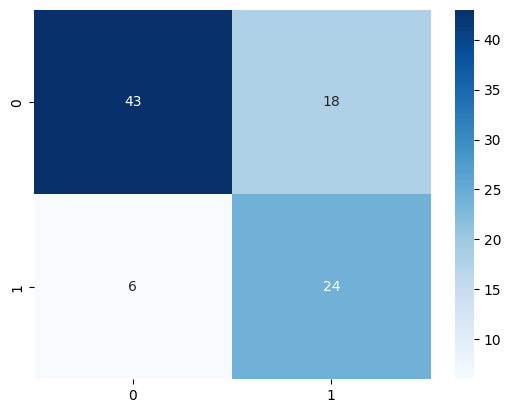

In [50]:
conf = confusion_matrix(y_valid, y_pred_R)
sns.heatmap(conf, annot=True, cmap='Blues')

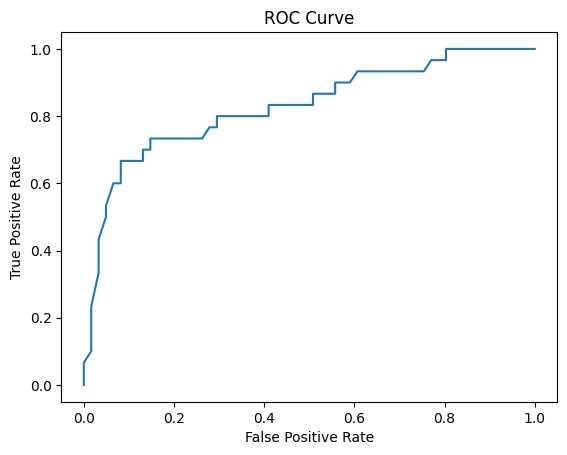

In [51]:
# ROC-AUC for Random Forest
y_proba_R = Model_R.predict_proba(X_valid)[:, 1]
fpr, tpr, _ = roc_curve(y_valid, y_proba_R)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

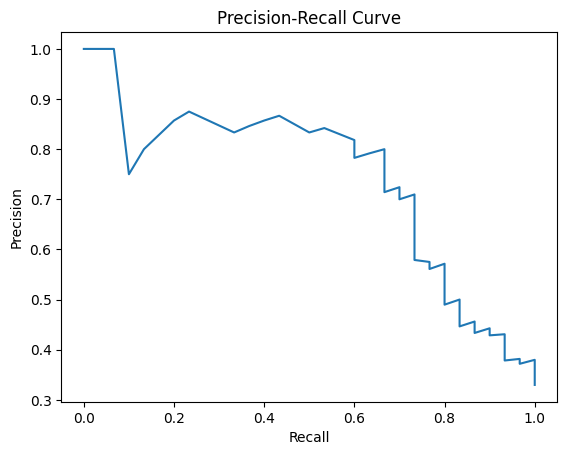

In [52]:
precision, recall, thresholds = precision_recall_curve(y_valid,y_proba_R)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

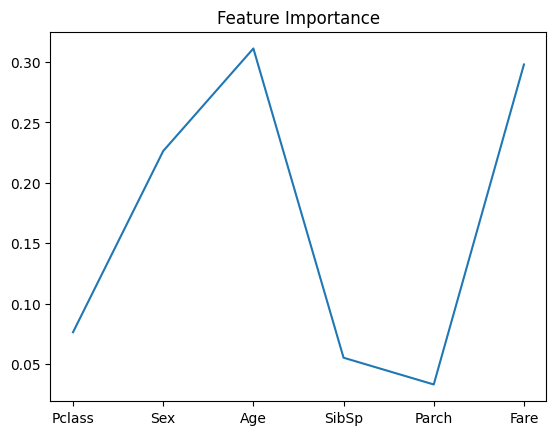

In [53]:
coefs = Model_R.feature_importances_
feature_names = X_train.columns
coef_series = pd.Series(coefs, index=feature_names)
coef_series.plot()
plt.title('Feature Importance')

## XGBoost Model

In [54]:
from xgboost import XGBClassifier

In [300]:
Model_X = XGBClassifier(class_weight='balanced')
Model_X.fit(X_train, y_train)

C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [301]:
y_pred_X = Model_X.predict(X_valid)
y_train_pred_X = Model_X.predict(X_train)

In [302]:
print(classification_report(y_valid, y_pred_X))
print("ROC-AUC Score (Decision tree):", roc_auc_score(y_valid, y_pred_X))
print("Accuracy score : ",accuracy_score(y_train, y_train_pred_X))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.76      0.69      0.72        45

    accuracy                           0.77       103
   macro avg       0.77      0.76      0.76       103
weighted avg       0.77      0.77      0.77       103

ROC-AUC Score (Decision tree): 0.7582375478927204
Accuracy score :  0.9728601252609603


<Axes: >

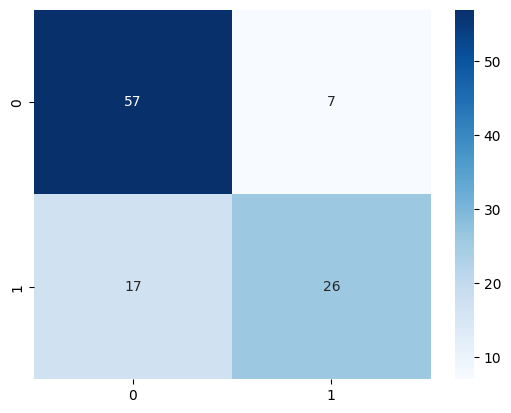

In [203]:
conf = confusion_matrix(y_valid, y_pred_X)
sns.heatmap(conf, annot=True, cmap='Blues')

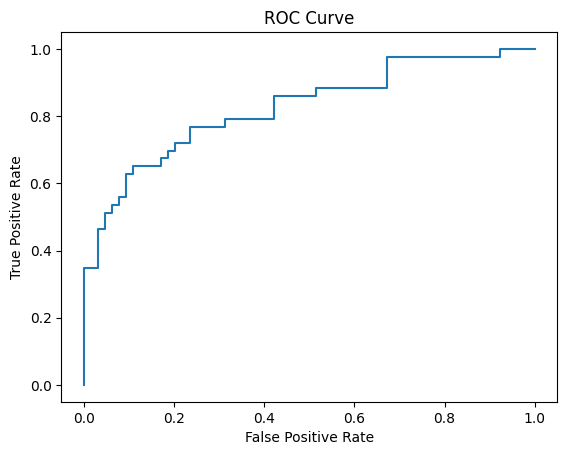

In [181]:
# ROC-AUC for XGboost
y_proba_X = Model_X.predict_proba(X_valid)[:, 1]
fpr, tpr, _ = roc_curve(y_valid, y_proba_X)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

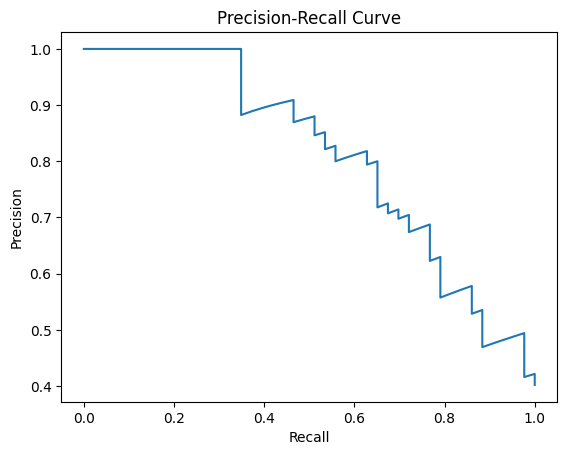

In [182]:
precision, recall, thresholds = precision_recall_curve(y_valid,y_proba_X)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

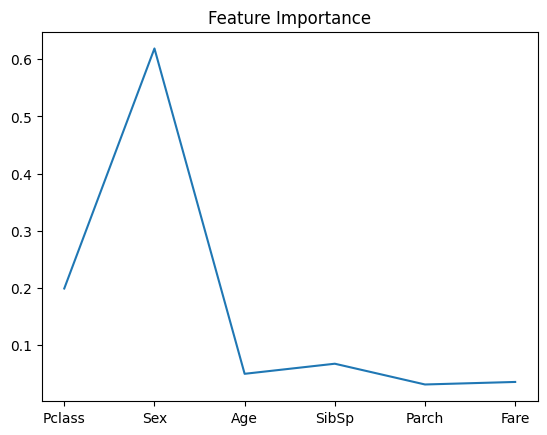

In [183]:
coefs = Model_X.feature_importances_
feature_names = X_train.columns
coef_series = pd.Series(coefs, index=feature_names)
coef_series.plot()
plt.title('Feature Importance')

## Model Comparison

In [246]:
comp = {
    "Model":['validation Accuracy', 'Train Accuracy', 'Percision', 'Recall', 'F1-score'],
    "Logistic regression":[0.74, 0.8, 0.7, 0.71, 0.70],
    "Decision Tree": [0.66, .99, .62, .58, .6],
    "Random Forest":[.71, .99, .70, .58, .63],
    "Xgboost":[.73, .98, .73, .6, .66]
}

comp_df = pd.DataFrame(comp)

In [247]:
comp_df

,Model,Logistic regression,Decision Tree,Random Forest,Xgboost
0,validation Accuracy,0.74,0.66,0.71,0.73
1,Train Accuracy,0.80,0.99,0.99,0.98
2,Percision,0.70,0.62,0.70,0.73
3,Recall,0.71,0.58,0.58,0.60
4,F1-score,0.70,0.60,0.63,0.66


- Xgboost is the tree model has least overfitting with highest validation accuracy

## Manual Hyperparameter Tuning

Tuning gamma 

In [303]:
for g in [.01, .1, .5, 1]:
    print(f"Gamma = {g}")
    Model_gX = XGBClassifier(class_weight='balanced', gamma=g)
    Model_gX.fit(X_train, y_train)
    
    y_pred_gX = Model_X.predict(X_valid)
    print(classification_report(y_valid, y_pred_gX))
    
    y_Tpred_gX = Model_gX.predict(X_train)
    train_acc_X = accuracy_score(y_train, y_Tpred_gX)
    print(f"Train Accuracy:{train_acc_X:.3f}")
    
    print("=====================================")

Gamma = 0.01


C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.76      0.69      0.72        45

    accuracy                           0.77       103
   macro avg       0.77      0.76      0.76       103
weighted avg       0.77      0.77      0.77       103

Train Accuracy:0.971
Gamma = 0.1
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.76      0.69      0.72        45

    accuracy                           0.77       103
   macro avg       0.77      0.76      0.76       103
weighted avg       0.77      0.77      0.77       103

Train Accuracy:0.933
Gamma = 0.5


C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.76      0.69      0.72        45

    accuracy                           0.77       103
   macro avg       0.77      0.76      0.76       103
weighted avg       0.77      0.77      0.77       103

Train Accuracy:0.906
Gamma = 1
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.76      0.69      0.72        45

    accuracy                           0.77       103
   macro avg       0.77      0.76      0.76       103
weighted avg       0.77      0.77      0.77       103

Train Accuracy:0.891


C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [311]:
for mcw in [ 1, 3, 5]:
    print(f"min_child_weight = {mcw}")
    Model_mcw_X = XGBClassifier(class_weight='balanced', min_child_weight=mcw, gamma=1)
    Model_mcw_X.fit(X_train, y_train)
    
    y_pred_mcw_X = Model_mcw_X.predict(X_valid)
    print(classification_report(y_valid, y_pred_mcw_X))
    
    y_Tpred_mcw_X = Model_mcw_X.predict(X_train)
    train_acc_X = accuracy_score(y_train, y_Tpred_mcw_X)
    print(f"Train Accuracy:{train_acc_X:.3f}")
    
    print("=====================================")

min_child_weight = 1
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        58
           1       0.81      0.64      0.72        45

    accuracy                           0.78       103
   macro avg       0.78      0.76      0.77       103
weighted avg       0.78      0.78      0.77       103

Train Accuracy:0.891
min_child_weight = 3


C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.72      0.86      0.79        58
           1       0.76      0.58      0.66        45

    accuracy                           0.74       103
   macro avg       0.74      0.72      0.72       103
weighted avg       0.74      0.74      0.73       103

Train Accuracy:0.862
min_child_weight = 5
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        58
           1       0.81      0.64      0.72        45

    accuracy                           0.78       103
   macro avg       0.78      0.76      0.77       103
weighted avg       0.78      0.78      0.77       103

Train Accuracy:0.860


C:\Users\body2\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


### Conclusion

- The best results can get it's also has overfitted
- improvements can do is add more data